### The next step of the process is to create some uniformity in our data, in other words we can resize images to squares so that we have images with centered plankton.

The image height is 50 pixels and the width is 35 pixels
The image resides at the path : /home/ubuntu/nbs/data/plankton/train/hydromedusae_partial_dark/143193.jpg


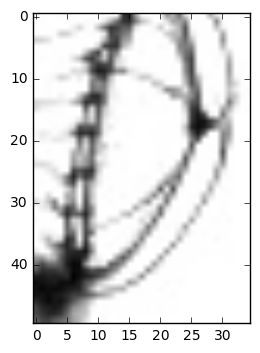

In [54]:
# Plotting a random image from our training set.
example_file = glob.glob(os.path.join(data_dir+"train", directory_names[52],'*.jpg'))[8]
im = imread(example_file)
plt.imshow(im, cmap=cm.gray)
# Notice that the shape of the image is defined as height by width.
print("The image height is {} pixels and the width is {} pixels").format(im.shape[0], im.shape[1])
print("The image resides at the path : {}").format(example_file)
plt.show()

### Now we define a function that aids us in resizing the images

In [55]:
# The function takes in the path of the image that needs to be resized and acts upon it.
# I've put a lot of print statements and images to aid in visualizing how the function works...
def resize_save_image(image_path):
    # Opening image and retrieving its array
    image_array = np.asarray(Image.open(image_path))
    
    image_shape = image_array.shape
    print("The height of the image is {} px and the width is {} px").format(image_shape[0], image_shape[1])
    print("************************************")
    
    # determining the padding of images so that they are all the same size...
    if image_shape[0] > image_shape[1]:
        print "The image height is greater than image width"
        padH = int((image_shape[0] - image_shape[1]) / 2)
        padV = 0
        print("The image is padded by {} pixels").format(padH)
        print("************************************")
        
    if image_shape[1] > image_shape[0]:
        print "The image width is greater than image height" 
        padH = 0
        padV = int((image_shape[1] - image_shape[0]) / 2)
        print("The image is padded by {} pixels").format(padV)
        print("************************************")

    
    if image_shape[1] == image_shape[0]:
        print("GUYZ...The image is already a square.")
        print "image_shape[1] == image_shape[0]"
        padH = 0
        padV = 0
        print("Ain't nobody got time for pad..")
        print("************************************")
    
    # The array is padded by px values of 255(white) according to the padding parameters we determine above.
    padded_array = np.pad(image_array, ((padV, padV), (padH, padH)), mode='constant', constant_values=255)
    print("Padding the array...")
    print("************************************")
    
    # The array is converted back to an image
    img = Image.fromarray(padded_array, 'L')
    print("************************************")
    print("This is what the image looks like after padding...")
    plt.imshow(img, cmap=cm.gray)
    plt.show()
    print("************************************")
    
    # The image is resized to a square depending on the largest side of the image.
    square = (np.max(image_array.shape))
    img = img.resize((square, square))
    print("************************************")
    print("This is what the final state of the image looks like...")
    plt.imshow(img, cmap=cm.gray)
    plt.show()
    print("************************************")
    
    img.save(image_path)
    print("************************************")
    print("Image saved to {}").format(image_path)

The height of the image is 50 px and the width is 35 px
************************************
The image height is greater than image width
The image is padded by 7 pixels
************************************
Padding the array...
************************************
************************************
This is what the image looks like after padding...


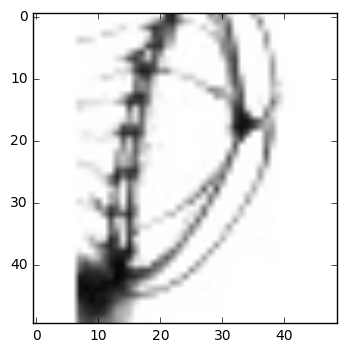

************************************
************************************
This is what the final state of the image looks like...


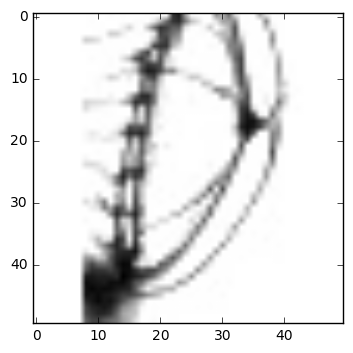

************************************
************************************
Image saved to /home/ubuntu/nbs/data/plankton/train/hydromedusae_partial_dark/143193.jpg


In [56]:
resize_save_image(example_file)